# Polynomial Regression using SciKit Learn

Date Created: 28/03/2017

Author: Nilesh Chaturvedi





In [1]:
#import necessary libraries
from sklearn import linear_model
from sklearn.preprocessing import normalize, PolynomialFeatures
import matplotlib.pyplot as plt
import csv
import numpy

In [2]:
#Load Data
def load_data(filename):
    
    file_data = csv.reader(open(filename, "r"), delimiter = ",")
    training_data = []
    testing_data = []
    for training_example in list(file_data)[2:]:
        if training_example[5]!="NaN":
            training_data.append([float(feature) for feature in training_example[:6]])
        else:
            testing_data.append([float(feature) for feature in training_example[:5]])
            
    return numpy.array(training_data), numpy.array(testing_data) 

In [3]:
def polynomial_regression_model(training):
    
    # Extract the features from training data.
    training_x = training[:,:5]
    
    # Extract values corresponding to every training example.
    training_y = (training[:,5])[:,numpy.newaxis]
    
    #normalize the data
    normalized_x = normalize(training_x, norm='l1', axis=0)
    normalized_y = normalize(training_y, norm='l1', axis=0)
    
    # Make a polynomial transform of the data.
    feature_transform = PolynomialFeatures(degree=2)
    polynomial_x = feature_transform.fit_transform(normalized_x)
    
    #Fit linear model to transformed data
    polynomial = linear_model.LinearRegression()
    polynomial.fit(polynomial_x, normalized_y)
    
    return polynomial

[ 1.          0.25179856  0.09090909  0.07078233  0.12459372  0.13651425
  0.06340252  0.02289078  0.01782289  0.03137252  0.03437409  0.00826446
  0.00643476  0.0113267   0.01241039  0.00501014  0.00881903  0.0096628
  0.01552359  0.01700882  0.01863614] : [ 0.80778098]


[ 1.          0.16546763  0.18181818  0.18626929  0.1787649   0.18299094
  0.02737954  0.03008502  0.03082154  0.0295798   0.03027908  0.03305785
  0.03386714  0.03250271  0.03327108  0.03469625  0.03329841  0.03408559
  0.03195689  0.03271236  0.03348569] : [ 1.0525165]


[ 1.          0.15827338  0.18181818  0.18680149  0.16576381  0.17821957
  0.02505046  0.02877698  0.0295657   0.026236    0.02820741  0.03305785
  0.03396391  0.03013888  0.03240356  0.0348948   0.03096493  0.03329168
  0.02747764  0.02954236  0.03176222] : [ 0.82236822]


[ 1.          0.15107914  0.18181818  0.20383183  0.18959913  0.18405125
  0.02282491  0.02746893  0.03079474  0.02864447  0.0278063   0.03305785
  0.03706033  0.03447257  0.033

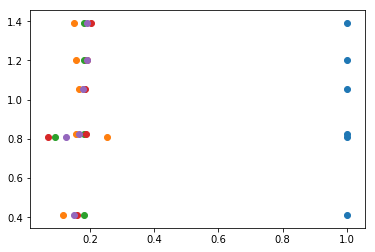

In [4]:
if __name__ == "__main__":
   
    input_data = load_data("data_carsmall.csv")
    training_data = input_data[0]
    
    normalized_test = normalize(input_data[1], norm = 'l1', axis = 0)
    feature_transform = PolynomialFeatures(degree=2)
    to_be_predicted = feature_transform.fit_transform(normalized_test)
    
    #Estimate using polynomial model
    polynomial_model = polynomial_regression_model(training_data)
    polynomial_model_output = polynomial_model.predict(to_be_predicted )
    
    for point in range(len(to_be_predicted)):
        print(str(to_be_predicted[point]) + " : " + str(polynomial_model_output[point]) + "\n\n")
        
    print("Polynomial Model Statistics \n\nWeights : {} \nBias : {}".format(polynomial_model.coef_, polynomial_model.intercept_))
    
    plt.scatter(to_be_predicted[:,0], polynomial_model_output, label = "Feature 1")
    plt.scatter(to_be_predicted[:,1], polynomial_model_output, label = "Feature 2")
    plt.scatter(to_be_predicted[:,2], polynomial_model_output, label = "Feature 3")
    plt.scatter(to_be_predicted[:,3], polynomial_model_output, label = "Feature 4")
    plt.scatter(to_be_predicted[:,4], polynomial_model_output, label = "Feature 5")
    plt.show()